# Problem Statement
## Develop a machine learning method to predict how people will rate movies, books etc

## Imorting Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")

In [2]:
df=pd.read_csv('movies.csv')

In [3]:
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


### Checking if any value in df is null

In [4]:
df.isnull().count()

Film                 77
Genre                77
Lead Studio          77
Audience score %     77
Profitability        77
Rotten Tomatoes %    77
Worldwide Gross      77
Year                 77
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
Film                 77 non-null object
Genre                77 non-null object
Lead Studio          77 non-null object
Audience score %     77 non-null int64
Profitability        77 non-null float64
Rotten Tomatoes %    77 non-null int64
Worldwide Gross      77 non-null object
Year                 77 non-null int64
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


In [6]:
df.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [7]:
df["Lead Studio"].unique()

array(['The Weinstein Company', 'Independent', 'Disney', 'Fox',
       '20th Century Fox', 'Warner Bros.', 'Summit', 'Paramount', 'CBS',
       'New Line', 'Sony', 'Universal', 'Lionsgate'], dtype=object)

### Encoding lead studio by LabelEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
# creating instance of labelencoder
labelencoder = LabelEncoder()


In [10]:
df['Lead Studio']= labelencoder.fit_transform(df['Lead Studio'])

In [11]:
df.head(10)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,10,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,10,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,4,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,2,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,3,72,6.267647,28,$219.37,2008
5,Water For Elephants,Drama,0,72,3.081421,60,$117.09,2011
6,WALL-E,Animation,2,89,2.896019,96,$521.28,2008
7,Waitress,Romance,4,67,11.089741,89,$22.18,2007
8,Waiting For Forever,Romance,4,53,0.005000,6,$0.03,2011
9,Valentine's Day,Comedy,12,54,4.184038,17,$217.57,2010


### Removing dollar sign from World wide gross

In [12]:
for i in range(df.shape[0]):
    df["Worldwide Gross"][i] = float(df["Worldwide Gross"][i].split("$")[1])

c:\users\manjeet singh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,10,70,1.747542,64,41.94,2008
1,Youth in Revolt,Comedy,10,52,1.090000,68,19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,4,35,1.211818,43,26.66,2010
3,When in Rome,Comedy,2,44,0.000000,15,43.04,2010
4,What Happens in Vegas,Comedy,3,72,6.267647,28,219.37,2008


### converting world wide gross from object to float

In [14]:
df["Worldwide Gross"] = df["Worldwide Gross"].astype(float, errors = 'raise')

### Heatmap to select column having high corr with audience score

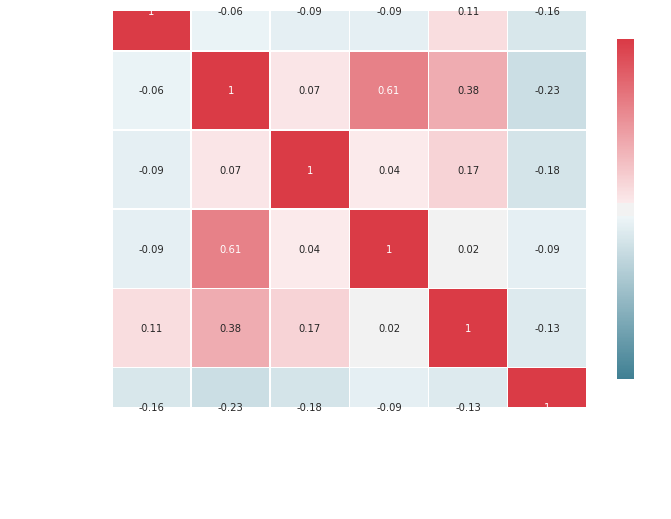

In [15]:
#generate the corelation matrix 
corr=df.corr().round(2)
#mask for the upper triangle
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]
# Set figure size
f, ax = plt.subplots(figsize=(10, 10))

#define custom colormap
cmap=sns.diverging_palette(220,10, as_cmap=True)

#draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()
plt.savefig("heatmap.png")

### converting data into X and Y

#### Selecting Rotten Tomatoes %,  Worldwide Gross because of high corr with audience sore

In [16]:
feature_cols = ['Rotten Tomatoes %' ,'Worldwide Gross']

In [17]:
x = df[feature_cols]
y = df["Audience score %"]

In [18]:
x = df[feature_cols]
x = x.astype(float)

In [19]:
x = np.array(x)
y = np.array(y)
x = x.reshape(-1,2)
y = y.reshape(-1,1)

In [20]:
x=np.array(x)
y=np.array(y)
y=y.reshape(-1,1)

### Converting x and y to train test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

### Using linear regression to fit x_train and y_train

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import explained_variance_score

In [24]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Score on trained data

In [25]:
trained_data_score = lr.score(x_train , y_train)
trained_data_score = round(trained_data_score*100)
print("R square score on trained data ", trained_data_score)

R square score on trained data  54.0


### Score on Testing data

In [26]:
test_data_score = lr.score(x_test,y_test)
test_data_score =  round(test_data_score*100)
print("R square Score on tesing data" , test_data_score)

R square Score on tesing data 39.0


### Visualizing reasult

In [27]:
prediction = lr.predict(x_test)

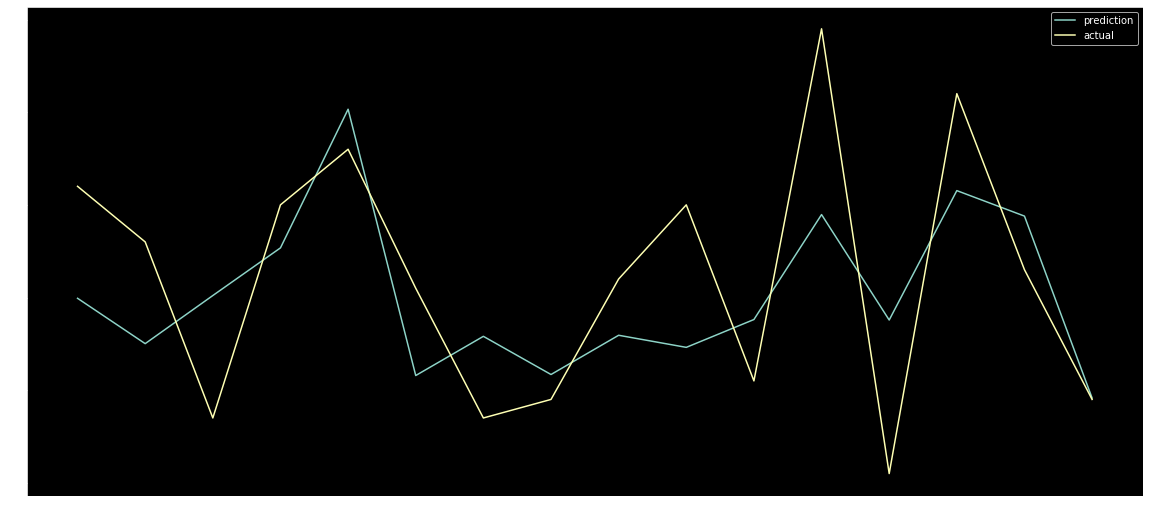

In [28]:
plt.figure(figsize=(20,9))
plt.plot(prediction,label = "prediction")
plt.plot(y_test, label = "actual")
plt.legend()
plt.savefig("curve.png")

# END